In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('../TextFiles/smsspamcollection.tsv', sep='\t')

In [4]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [7]:
#Shows if any data values are missing
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [8]:
#How many msgs we have
len(df)

5572

In [12]:
#lists unique labels
df['label'].unique()

array(['ham', 'spam'], dtype=object)

In [14]:
#Lists number of items under each label
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

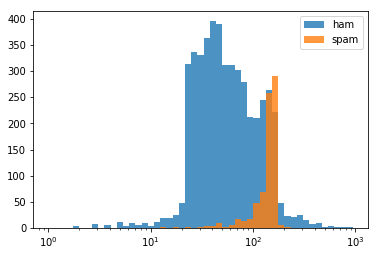

In [17]:
#Visualization of length of msgs in each label
import matplotlib.pyplot as plt
%matplotlib inline

plt.xscale('log')
bins = 1.15**(np.arange(0, 50))
plt.hist(df[df['label']=='ham']['length'], bins=bins, alpha=0.8)
plt.hist(df[df['label']=='spam']['length'], bins=bins, alpha=0.8)
plt.legend(('ham', 'spam'))
plt.show()

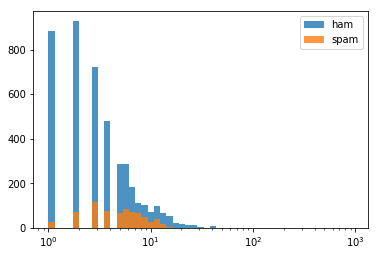

In [18]:
#Visualization of punctuation in each label
plt.xscale('log')
bins = 1.15**(np.arange(0, 50))
plt.hist(df[df['label']=='ham']['punct'], bins=bins, alpha=0.8)
plt.hist(df[df['label']=='spam']['punct'], bins=bins, alpha=0.8)
plt.legend(('ham', 'spam'))
plt.show()

In [19]:
#Spliting data to training and test sets
from sklearn.model_selection import train_test_split

In [20]:
#X feature data
X = df[['length', 'punct']]
#y is our label
y = df['label']

#random not really required
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [21]:
X_train.shape

(3900, 2)

In [22]:
X_test.shape

(1672, 2)

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
lr_model = LogisticRegression(solver='lbfgs')

In [26]:
lr_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [27]:
from sklearn import metrics

In [30]:
#Predicting
predictions = lr_model.predict(X_test)

In [31]:
predictions

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [34]:
print(metrics.confusion_matrix(y_test, predictions))

[[1404   44]
 [ 219    5]]


In [35]:
df = pd.DataFrame(metrics.confusion_matrix(y_test, predictions), index=['ham', 'spam'], columns=['ham', 'spam'])

In [36]:
df

,ham,spam
ham,1404,44
spam,219,5


In [38]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

         ham       0.87      0.97      0.91      1448
        spam       0.10      0.02      0.04       224

   micro avg       0.84      0.84      0.84      1672
   macro avg       0.48      0.50      0.48      1672
weighted avg       0.76      0.84      0.80      1672



In [40]:
print(metrics.accuracy_score(y_test, predictions))

0.8427033492822966


In [41]:
#Using another type of model
from sklearn.naive_bayes import MultinomialNB

In [42]:
nb_model = MultinomialNB()

In [43]:
nb_model.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [44]:
predictions = nb_model.predict(X_test)

In [45]:
print(metrics.confusion_matrix(y_test, predictions))

[[1438   10]
 [ 224    0]]


In [46]:
#worse than previous one lol, but thats how id make another type of model

In [47]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

         ham       0.87      0.99      0.92      1448
        spam       0.00      0.00      0.00       224

   micro avg       0.86      0.86      0.86      1672
   macro avg       0.43      0.50      0.46      1672
weighted avg       0.75      0.86      0.80      1672



In [48]:
#Another model
from sklearn.svm import SVC

In [50]:
svc_model = SVC(gamma='auto')

svc_model.fit(X_train, y_train)

predictions = svc_model.predict(X_test)

print(metrics.confusion_matrix(y_test, predictions))

[[1373   75]
 [ 121  103]]


In [51]:
#Better at finding spam
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

         ham       0.92      0.95      0.93      1448
        spam       0.58      0.46      0.51       224

   micro avg       0.88      0.88      0.88      1672
   macro avg       0.75      0.70      0.72      1672
weighted avg       0.87      0.88      0.88      1672

